# **Handwritten Digit Recognition**

In [0]:
# https://keras.io/
# Install keras for colab, if not installed already
!pip install -q keras
# Import keras package for colab notebook
import keras

In [0]:
# import numpy for matrix operation
import numpy as np
# Import convolution, flattern and sequential methods from keras subpackage
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
# nputils: converts numerical value into 1-hot encoded vector for category prediction
from keras.utils import np_utils
# import datasets package to load mnist dataset
from keras.datasets import mnist

In [0]:
# load minist dataset and store them in tuple of arrays X_train,y_train, X_test & y_test.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


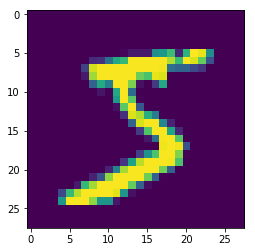

In [22]:
# print train variables dimensions
print (X_train.shape)
# import matplotlib package to draw image in screen
from matplotlib import pyplot as plt
%matplotlib inline
# Plot a sample X_train[0] as image
plt.imshow(X_train[0])

In [0]:
# Reshapes an output to a certain shape.
# Reshape X_train & X_test dimension with single channel for monochrome Image
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Convert X_train,X_test as type float32 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Divide X_train,X_test arrays by 255, since RGB rage is 0-255 to make math easy
X_train /= 255
X_test /= 255

In [25]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [27]:
# Numerical values converted into 1-hot encoded vector
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [28]:
# Import Activation & MaxPooling2D
from keras.layers import Activation, MaxPooling2D
# Define Convolution Neural Network model architecture
model = Sequential() 
# input channel : 28x28x1
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # receptive field: 3x3

# input channel : 26x26x32
model.add(Convolution2D(64, 3, 3, activation='relu')) # receptive field: 5x5

# input channel : 24x24x64
model.add(Convolution2D(128, 3, 3, activation='relu')) # receptive field: 7x7

# input channel : 22x22x128
model.add(MaxPooling2D(pool_size=(2, 2))) #  receptive field: 14x14

# input channel : 11x11x128 
model.add(Convolution2D(256, 3, 3, activation='relu')) # receptive field: 16x16

# input channel : 9x9x256
model.add(Convolution2D(512, 3, 3, activation='relu')) # receptive field: 18x18

# input channel : 7x7x512 
model.add(Convolution2D(1024, 3, 3, activation='relu')) # receptive field: 20x20

# input channel : 5x5x1024 
model.add(Convolution2D(2048, 3, 3, activation='relu')) # receptive field: 22x22

# input channel : 3x3x2048 
model.add(Convolution2D(10, 3, 3, activation='relu')) # receptive field: 24x24

# input channel : 1x1x10 
# Flattern input into 1-D array.
model.add(Flatten()) # receptive field: 24x24

# softmax - Non-linear activation function and type of sigmoid function used to predict output of classifier. 
# It decided output label(e.g. digit) of the classifier.
model.add(Activation('softmax'))

# Summary about size of image in output layers & parameters used in each layers in model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update 

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [30]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 118s 2ms/step - loss: 2.3032 - acc: 0.0988
Epoch 2/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
  128/60000 [..............................] - ETA: 2:46 - loss: 2.3026 - acc: 0.0391

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113142). Check your callbacks.
  % delta_t_median)


60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [32]:
print(score)

[2.3025851249694824, 0.098]


In [0]:
y_pred = model.predict(X_test)

In [36]:
print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


### Conclusion:
#### We build 3 convolution operation with kernel size of 32, 64 & 123 and then applied Max Pooling. Here, we should have detected edges and gradients. After that, we extended our convolution operation with kernel sizes of 128,512,1024 & 2048 and applied 1x1x10 to output 10 digits prediction between 0-9 through which we build digit prediction classifier. <br>
#### Flaw is this architecture is once be detected edges & gradients we applied couple of convolution operation and made prediction that failed to detect textures, part of object from input images. We should have applied another Max polling layer before 2-3 final convolution layer that should have detected texture and patterns from input image and finally 1x1x10 should be able to detect part of object or Object. <br>
